In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats

from statsmodels.gam.api import GLMGam, BSplines

plt.style.use("tableau-colorblind10")

F_SHOW = False


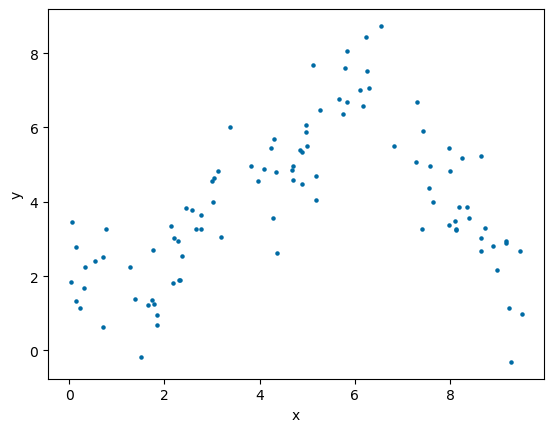

In [2]:
N = 100
rng = np.random.default_rng(123)

x = rng.uniform(0, 10, size=N)


def f(x):
    return 1 + np.cos(x * 2) + x * np.sin(x / 3)


eps = rng.normal(loc=0, scale=1.0, size=N)
y = f(x) + eps

x_line = np.linspace(x.min(), x.max())
if F_SHOW:
    plt.plot(x_line, f(x_line), c="k", ls="--", label="f(x)")
    plt.legend()
plt.scatter(x, y, s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [3]:
df = pd.DataFrame.from_dict({"y": y, "x": x})
df.to_csv("toy_data.csv", index=False)


# OLS

In [4]:
ols = sm.OLS(endog=y, exog=sm.add_constant(x)).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     11.45
Date:                Fri, 12 May 2023   Prob (F-statistic):            0.00103
Time:                        10:50:29   Log-Likelihood:                -204.47
No. Observations:                 100   AIC:                             412.9
Df Residuals:                      98   BIC:                             418.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8534      0.372      7.663      0.000       2.114       3.592
x1             0.2264      0.067      3.385      0.001       0.094       0.359
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   2.303
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.113
Skew:                           0.057   Prob(JB):                        0.945
Kurtosis:                       2.881   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

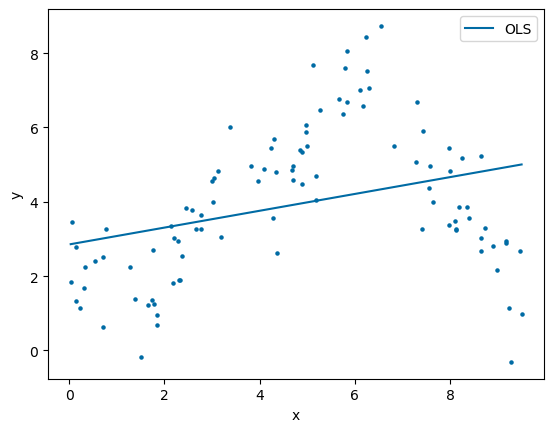

In [5]:
x_line = np.linspace(x.min(), x.max())

plt.scatter(x, y, s=5)
if F_SHOW:
    plt.plot(x_line, f(x_line), c="k", ls="--", label="f(x)")
plt.plot(x_line, ols.predict(sm.add_constant(x_line)), label="OLS")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# GAM

モデルの注意書きを使用する際は良く読んでおくこと！

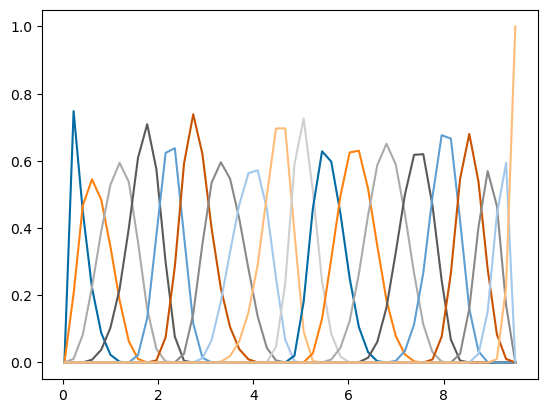

In [6]:
# B spline基底関数
bs = BSplines(x, df=20, degree=3, include_intercept=False)
phi = bs.transform(x_line)

plt.plot(x_line, phi)
plt.show()

In [7]:
model = GLMGam(endog=y, exog=np.ones_like(x), smoother=bs, family=sm.families.Gaussian()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                         GLMGam   Df Residuals:                    80.00
Model Family:                Gaussian   Df Model:                        19.00
Link Function:               identity   Scale:                         0.87186
Method:                         PIRLS   Log-Likelihood:                -123.88
Date:                Fri, 12 May 2023   Deviance:                       69.749
Time:                        10:50:29   Pearson chi2:                     69.7
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9753
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6691      0.761      3.506      0.000       1.177       4.161
x0_s0         -1.1234      1.254     -0.896      0.371      -3.582       1.335
x0_s1          0.0108      1.419      0.008      0.994      -2.771       2.792
x0_s2         -0.9447      1.665     -0.567      0.570      -4.208       2.318
x0_s3         -1.8302      1.056     -1.733      0.083      -3.900       0.240
x0_s4          0.2175      1.039      0.209      0.834      -1.818       2.253
x0_s5          0.6136      1.094      0.561      0.575      -1.530       2.758
x0_s6          2.7057      1.339      2.021      0.043       0.082       5.330
x0_s7          2.3131      1.313      1.762      0.078      -0.260       4.887
x0_s8          1.3565      1.127      1.203      0.229      -0.853       3.566
x0_s9          3.3033      1.011      3.267      0.001       1.321       5.285
x0_s10         3.0137      1.375      2.193      0.028       0.320       5.708
x0_s11         5.6450      1.285      4.394      0.000       3.127       8.163
x0_s12         4.0632      1.562      2.601      0.009       1.002       7.125
x0_s13         1.8931      1.153      1.642      0.101      -0.366       4.153
x0_s14         1.2786      1.036      1.235      0.217      -0.751       3.308
x0_s15         1.2341      1.289      0.958      0.338      -1.291       3.760
x0_s16         0.1682      1.720      0.098      0.922      -3.203       3.539
x0_s17        -1.8127      1.469     -1.234      0.217      -4.692       1.066
x0_s18        -1.0037      1.082     -0.927      0.354      -3.125       1.117
==============================================================================
"""

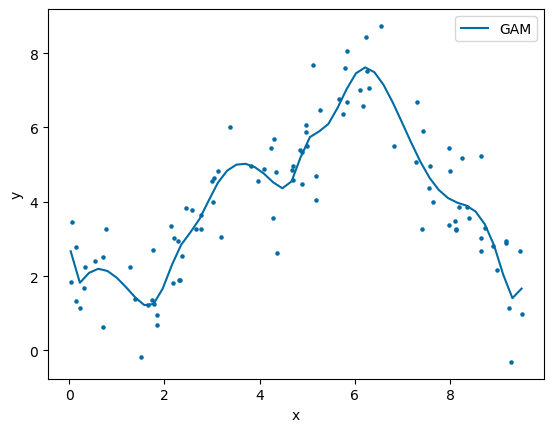

In [8]:
x_line = np.linspace(x.min(), x.max())

plt.scatter(x, y, s=5)
if F_SHOW:
    plt.plot(x_line, f(x_line), c="k", ls="--", label="f(x)")
plt.plot(
    x_line,
    model.predict(np.ones_like(x_line), exog_smooth=x_line),
    label="GAM"
)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


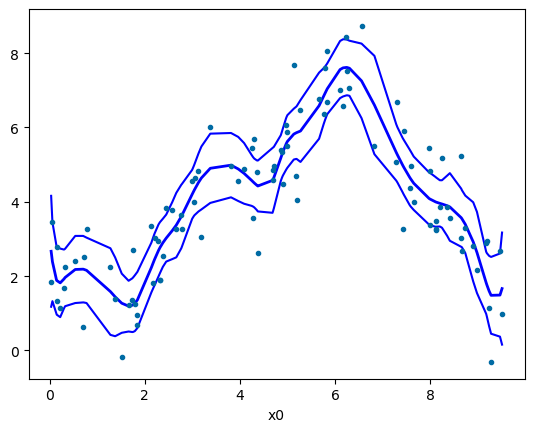

In [9]:
model.plot_partial(0, cpr=True);

# チューニング

In [10]:
# P-spline の罰則を調整
alpha, opt_rslt, _ = model.model.select_penweight("gcv")
print("best alpha = ", alpha)
opt_rslt

best alpha =  [0.14823635]


                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 1.0147800459424052
                          x: [-1.909e+00]
                        nit: 10
      minimization_failures: 0
                       nfev: 322
 lowest_optimization_result:       message: Optimization terminated successfully.
                                   success: True
                                    status: 0
                                       fun: 1.0147800459424052
                                         x: [-1.909e+00]
                                       nit: 14
                                      nfev: 28
                             final_simplex: (array([[-1.909e+00],
                                                   [-1.909e+00]]), array([ 1.015e+00,  1.015e+00]))

In [11]:
model_tuned = GLMGam(endog=y, exog=np.ones_like(x), smoother=bs, alpha=alpha, family=sm.families.Gaussian()).fit()
model_tuned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                         GLMGam   Df Residuals:                    91.21
Model Family:                Gaussian   Df Model:                         7.79
Link Function:               identity   Scale:                         0.84415
Method:                         PIRLS   Log-Likelihood:                -128.82
Date:                Fri, 12 May 2023   Deviance:                       76.992
Time:                        10:50:31   Pearson chi2:                     77.0
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9757
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2317      0.405      5.509      0.000       1.438       3.026
x0_s0         -0.0634      0.115     -0.551      0.582      -0.289       0.162
x0_s1         -0.3207      0.569     -0.564      0.573      -1.435       0.794
x0_s2         -0.8670      0.652     -1.330      0.184      -2.145       0.411
x0_s3         -0.6218      0.525     -1.185      0.236      -1.650       0.407
x0_s4          0.2796      0.499      0.560      0.575      -0.698       1.257
x0_s5          1.2442      0.502      2.478      0.013       0.260       2.228
x0_s6          2.4348      0.596      4.083      0.000       1.266       3.603
x0_s7          2.3200      0.592      3.919      0.000       1.160       3.480
x0_s8          2.7023      0.495      5.455      0.000       1.731       3.673
x0_s9          3.3052      0.484      6.828      0.000       2.357       4.254
x0_s10         4.2059      0.545      7.723      0.000       3.138       5.273
x0_s11         5.2588      0.561      9.371      0.000       4.159       6.359
x0_s12         4.4448      0.632      7.029      0.000       3.205       5.684
x0_s13         2.7482      0.555      4.955      0.000       1.661       3.835
x0_s14         1.8926      0.502      3.772      0.000       0.909       2.876
x0_s15         1.2200      0.512      2.382      0.017       0.216       2.224
x0_s16         0.2767      0.530      0.522      0.601      -0.762       1.315
x0_s17        -0.4968      0.543     -0.915      0.360      -1.561       0.568
x0_s18        -0.8570      0.616     -1.392      0.164      -2.064       0.350
==============================================================================
"""

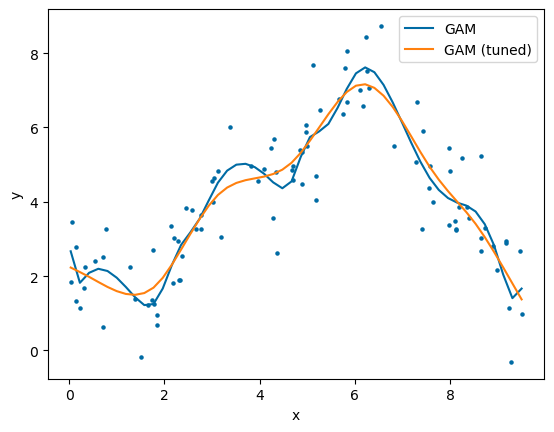

In [12]:
x_line = np.linspace(x.min(), x.max())

plt.scatter(x, y, s=5)
if F_SHOW:
    plt.plot(x_line, f(x_line), c="k", ls="--", label="f(x)")
plt.plot(
    x_line,
    model.predict(np.ones_like(x_line), x_line),
    label="GAM"
)
plt.plot(
    x_line,
    model_tuned.predict(np.ones_like(x_line), x_line),
    label="GAM (tuned)"
)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
